In [1]:
# Simple Linear Regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import dataset

dataset = pd.read_csv('auto_insurance_payment.csv')

In [6]:
dataset.head()

,Number of claims,Total Payment
0,108,3925
1,19,462
2,13,157
3,124,4222
4,40,1194


In [7]:
dataset.shape

(63, 2)

In [8]:
dataset.describe()

,Number of claims,Total Payment
count,63.000000,63.000000
mean,22.904762,921.873016
std,23.351946,878.266281
min,0.000000,0.000000
25%,7.500000,299.000000
50%,14.000000,596.000000
75%,29.000000,1364.000000
max,124.000000,4222.000000


In [9]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values


In [12]:
X.shape

(63, 1)

In [14]:
y.shape

(63,)

In [15]:
dataset.corr()

,Number of claims,Total Payment
Number of claims,1.000000,0.880668
Total Payment,0.880668,1.000000


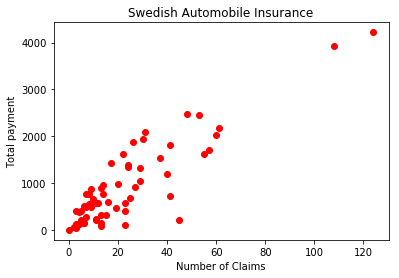

In [18]:
# Visualise dataset
plt.scatter(X, y, color = 'red')
plt.title('Swedish Automobile Insurance')
plt.xlabel('Number of Claims')
plt.ylabel('Total payment')
plt.show()


In [26]:
# Split dataset into Training and Test set
# sklearn.cross_validation  - Deprecated

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [2]:
# Feature Scaling
# Alternative: ColumnTransformer
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1, 1))
X_test = sc_X.fit_transform(X_test)
y_test_org = y_test
y_test = sc_y.fit_transform(np.array(y_test).reshape(-1, 1))


NameError: name 'X_train' is not defined

In [27]:
# Simple Linear Regression with Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Predict Test set
y_pred = regressor.predict(X_test)

In [16]:
# Print unscaled test and predicted values
y_pred_inv = sc_y.inverse_transform(y_pred)
print(pd.DataFrame(np.column_stack((y_test_org, y_pred_inv))))

         0            1
0   1528.0  1745.143005
1    399.0   111.462971
2   1875.0  1216.599464
3     93.0   591.957099
4    146.0   255.611209
5   1615.0  1024.401813
6    381.0   159.512384
7    213.0   495.858273
8   2481.0  2273.686545
9    157.0   591.957099
10   118.0   159.512384
11   955.0   640.006511
12  1194.0  1889.291243


In [29]:
# Print Coefficient & Intercept
print('Coefficient: ', regressor.coef_)
print('Intercept: ', regressor.intercept_)


Coefficient:  [32.18742386]
Intercept:  164.67433032293604


In [30]:
# Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, accuracy_score
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % explained_variance_score(y_test, y_pred))
# Coefficient of determination
print('R^2 Square value', r2_score(y_test, y_pred))


Mean absolute error: 383.98
Mean squared error: 210618.10
Root Mean squared error: 458.93
Variance score: 0.66
R^2 Square value 0.6488832597282386


In [3]:
# Visualise Training set result
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('Swedish Automobile Insurance Data (Training set)')
plt.xlabel('Number of Claims')
plt.ylabel('Total payment')
plt.show()


NameError: name 'plt' is not defined

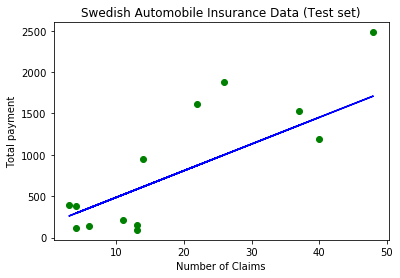

In [32]:
# Visualise Test set result
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Swedish Automobile Insurance Data (Test set)')
plt.xlabel('Number of Claims')
plt.ylabel('Total payment')
plt.show()


In [36]:
lr_pred =regressor.predict(np.array([[108]]))

In [37]:
lr_pred

array([3640.91610757])

In [35]:
dataset

,Number of claims,Total Payment
0,108,3925
1,19,462
2,13,157
3,124,4222
4,40,1194
5,57,1709
6,23,569
7,14,775
8,45,214
9,10,653
